<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

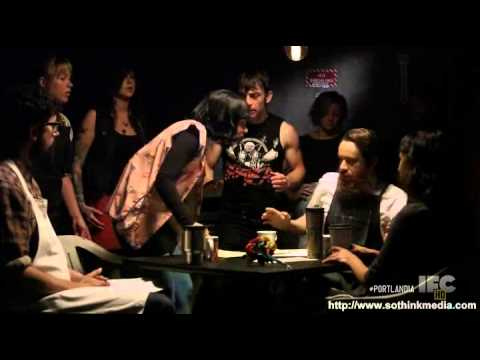

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'c:\\Users\\Matt\\Documents\\GitHub\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [4]:
# Start here 
shops.shape

(7616, 3)

In [5]:
shops['coffee_shop_name'].value_counts()

Epoch Coffee                            400
Halcyon                                 300
The Factory - Cafe With a Soul          244
Houndstooth Coffee                      200
Venezia Italian Gelato                  200
                                       ... 
Lucky Lab Coffee                         25
Sister Coffee                            17
Kowabunga Coffee                         16
The Marvelous Vintage Tea Party Co.      10
Lola Savannah Coffee Downtown             4
Name: coffee_shop_name, Length: 79, dtype: int64

In [6]:
shops['star_rating'].value_counts()

 5.0 star rating     3780
 4.0 star rating     2360
 3.0 star rating      738
 2.0 star rating      460
 1.0 star rating      278
Name: star_rating, dtype: int64

In [7]:
import re
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub(r'[^a-zA-Z ^0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

In [8]:
shops['tokens'] = shops['full_review_text'].apply(tokenize)
shops['tokens']

0       [11252016, 1, checkin, love, love, loved, the,...
1       [1222016, listed, in, date, night, austin, amb...
2       [11302016, 1, checkin, listed, in, brunch, spo...
3       [11252016, very, cool, decor, good, drinks, ni...
4       [1232016, 1, checkin, they, are, located, with...
                              ...                        
7611    [2192015, i, actually, step, into, this, resta...
7612    [1212016, ok, the, steeping, room, is, awesome...
7613    [4302015, loved, coming, here, for, tea, and, ...
7614    [822015, the, food, is, just, average, the, bo...
7615    [5232015, i, finally, stopped, in, for, lunch,...
Name: tokens, Length: 7616, dtype: object

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [9]:
from collections import Counter
word_counts = Counter()
shops['tokens'].apply(lambda x: word_counts.update(x))

0       None
1       None
2       None
3       None
4       None
        ... 
7611    None
7612    None
7613    None
7614    None
7615    None
Name: tokens, Length: 7616, dtype: object

In [10]:
word_counts.most_common(50)


[('the', 34809),
 ('and', 26650),
 ('a', 22755),
 ('i', 20237),
 ('to', 17164),
 ('of', 12600),
 ('is', 11999),
 ('coffee', 10353),
 ('was', 9707),
 ('in', 9546),
 ('it', 9379),
 ('for', 8680),
 ('this', 6583),
 ('but', 6501),
 ('with', 6332),
 ('my', 6202),
 ('they', 6165),
 ('that', 6151),
 ('you', 5847),
 ('place', 5426),
 ('on', 5251),
 ('have', 5019),
 ('so', 4557),
 ('are', 4359),
 ('not', 4207),
 ('good', 3973),
 ('great', 3919),
 ('its', 3633),
 ('their', 3633),
 ('had', 3402),
 ('here', 3299),
 ('be', 3282),
 ('like', 3088),
 ('at', 3079),
 ('as', 3044),
 ('there', 2975),
 ('if', 2897),
 ('out', 2726),
 ('or', 2653),
 ('we', 2633),
 ('just', 2615),
 ('me', 2613),
 ('all', 2551),
 ('from', 2501),
 ('very', 2443),
 ('get', 2427),
 ('were', 2339),
 ('really', 2317),
 ('one', 2287),
 ('austin', 2252)]

In [11]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [12]:
wc = count(shops['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
17,the,6847,34809,1.0,0.044537,0.044537,0.899028
48,and,6864,26650,2.0,0.034098,0.078634,0.901261
47,a,6246,22755,3.0,0.029114,0.107748,0.820116
19,i,5528,20237,4.0,0.025892,0.133641,0.725840
55,to,5653,17164,5.0,0.021961,0.155601,0.742253


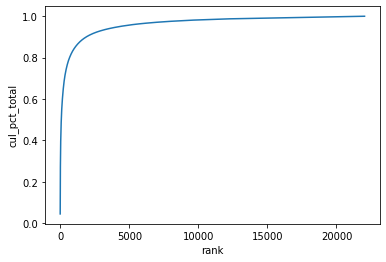

In [13]:
import seaborn as sns

sns.lineplot(x='rank', y='cul_pct_total', data=wc);


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


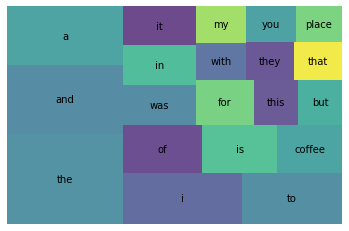

In [14]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [16]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

OSError: [E050] Can't find model 'en_core_web_lg'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

